In [27]:
import os
import time
import warnings
import datetime
import numpy as np
import pandas as pd
import random
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy.optimize import minimize
import scipy.stats as st

import pylab

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


from IPython.display import Image, SVG

%matplotlib inline

In [4]:
def plot_data(X_data, y_data, X_train=None, y_train=None, clf=None):
    # Create plot
    fig = plt.figure(figsize = (10,7))
    
    x_min, x_max = min(zip(*X_data)[0]), max(zip(*X_data)[0])
    y_min, y_max = min(zip(*X_data)[1]), max(zip(*X_data)[1])
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    h = min((x_max-x_min)/100., (y_max-y_min)/100.)
    
    # cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    
    if X_train and y_train:
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z)
    
    plt.scatter(zip(*X_data)[0], zip(*X_data)[1], c=y_data)

# 1. Метод k ближайших соседей

In [25]:
# Init random state
random.seed(31)
np.random.seed(127)

# Generate data
K = 10
data = []
for k in xrange(K):
    # feature 1
    mu_x = random.randint(0, 50)
    d_x = random.randint(1, 3)
    # feature 2
    mu_y = random.randint(0, 50)
    d_y = random.randint(1, 3)
    # count of elements
    count = random.randint(100, 120)
    new_cluster = [(d, k) for d in zip(np.random.normal(mu_x, d_x, count), np.random.normal(mu_y, d_y, count))]
    
    data += new_cluster
random.shuffle(data)
X_data, y_data = zip(*data)

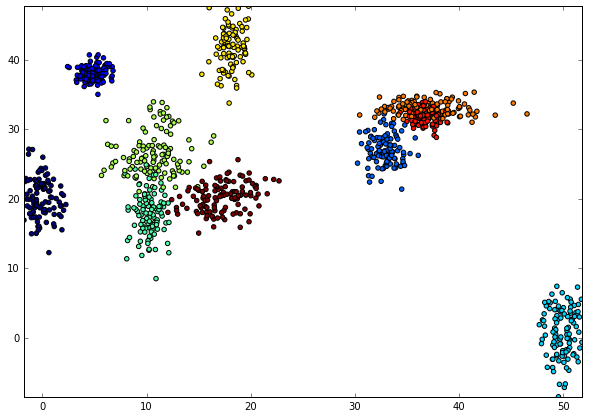

In [26]:
plot_data(X_data, y_data)

In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

In [28]:
# creating list of K for KNN
neighbors = list(range(1,50))

# empty list that will hold cv scores
cv_scores = []

# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    # scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    scores = cross_val_score(knn, X_data, y_data, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 11


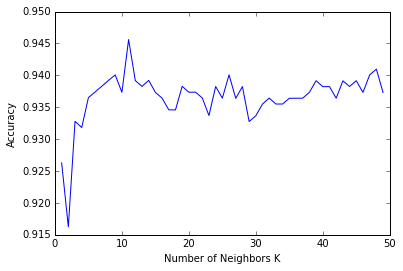

In [29]:
# determining best k
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print "The optimal number of neighbors is %d" % optimal_k

# Accuracy vs k
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

### graphic for optimal

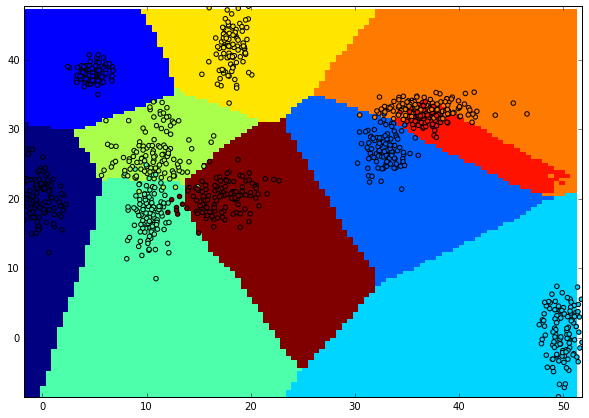

In [30]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
plot_data(X_data, y_data, X_train, y_train, knn)

# 2. Наивный байесовский классификатор

In [9]:
from sklearn import datasets
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [10]:
digits = datasets.load_digits()
breast_cancer = datasets.load_breast_cancer()

In [15]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [12]:
pd.DataFrame(digits.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [16]:
set(breast_cancer.target)

{0, 1}

In [13]:
pd.DataFrame(breast_cancer.data).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
def explore_dataset(data, target):
    score_BernoulliNB = cross_val_score(BernoulliNB(), data, target).mean()
    score_MultinomialNB = cross_val_score(MultinomialNB(), data, target).mean()
    score_GaussianNB = cross_val_score(GaussianNB(), data, target).mean()
    print "BernoulliNB: %f" % score_BernoulliNB
    print "MultinomialNB: %f" % score_MultinomialNB
    print "GaussianNB: %f" % score_GaussianNB
    return (score_BernoulliNB, score_MultinomialNB, score_GaussianNB)

In [18]:
print "Digits max %f" % max(explore_dataset(digits.data, digits.target))

BernoulliNB: 0.825824
MultinomialNB: 0.870877
GaussianNB: 0.818600
Digits max 0.870877


In [19]:
print "Breast cancer max %f" % max(explore_dataset(breast_cancer.data, breast_cancer.target))

BernoulliNB: 0.627420
MultinomialNB: 0.894579
GaussianNB: 0.936749
Breast cancer max 0.936749


### 1. Каким получилось максимальное качество классификации на датасете breast_cancer?
max 0.936749
### 2. Каким получилось максимальное качество классификации на датасете digits?
max 0.870877
### 3. Какие утверждения из приведенных ниже верны ?
[ ] На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли

[ ] На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным распределением

[X] Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков

[X] На вещественных признаках лучше всего сработало нормальное распределение

# 3. Метрики в задаче регрессии

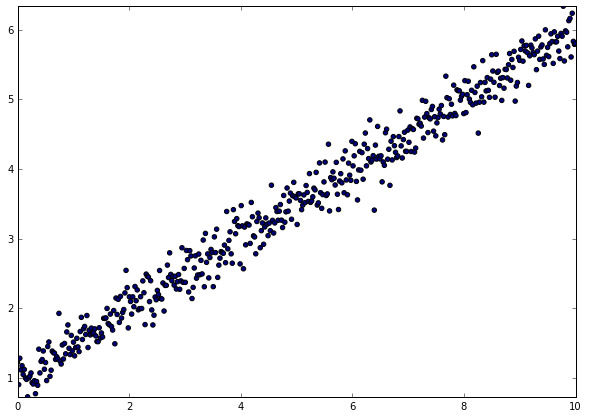

In [34]:
limit = 10
dot_count = 500
x = np.linspace(0, limit, dot_count)
y = .5*x + 1 + np.random.normal(0, 0.2, dot_count)
dots = zip(x, y)
plot_data(dots, [0]*dot_count)

In [35]:
def MSE(arg):
    return ((arg[0] * x + arg[1] - y) ** 2).mean()

def MAE(arg):
    return np.abs(arg[0] * x + arg[1] - y).mean()

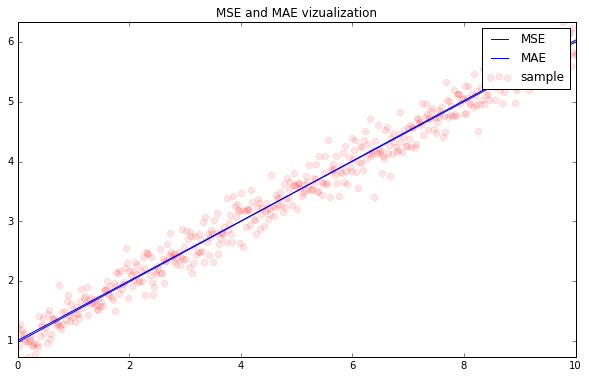

In [36]:
mse = minimize(MSE, [1, 1])
mae = minimize(MAE, [1, 1])

plt.figure(figsize=(10, 6)) 
plt.scatter(x, y, alpha=0.1, s=40, color='red', label='sample')  
plt.plot(x,mse.x[0] * x + mse.x[1],color='blue', label='MSE')
plt.plot(x,mae.x[0] * x + mae.x[1],color='blue', label='MAE')
plt.legend()
plt.title("MSE and MAE vizualization")
plt.xlim([0,limit])
plt.ylim([min(y),max(y)])
plt.show()

Расширим выборку, добавив 75 точек с зависимостью $y = -1 + \varepsilon$

In [37]:
count_new_dots = 75
x = np.append(x, np.linspace(0, limit, count_new_dots))
eps = st.norm.rvs(loc=0, scale=0.2 ** 0.5, size=75)
y = np.append(y, -1 + eps)

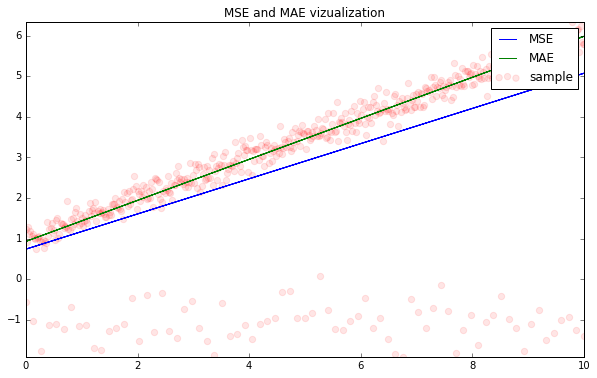

In [38]:
mse = minimize(MSE, [1, 1])
mae = minimize(MAE, [1, 1])

plt.figure(figsize=(10, 6)) 
plt.scatter(x, y, alpha=0.1, s=40, color='red', label='sample')  
plt.plot(x,mse.x[0] * x + mse.x[1],color='blue', label='MSE')
plt.plot(x,mae.x[0] * x + mae.x[1],color='green', label='MAE')
plt.legend()
plt.title("MSE and MAE vizualization")
plt.xlim([0,limit])
plt.ylim([min(y),max(y)])
plt.show()

MAE более устойчива к выбросам